In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [34]:
class Bandit:
  def __init__(self):
    self.arm_set = np.random.normal(0,1,10)
    self.K = np.ones(10)
    self.estimated = np.zeros(10)
    self.exploration = 0
    self.exploitation = 0
    self.action_set = np.zeros(10)
    self.c = 0.4

  def get_reward(self,action):
    noise = np.random.normal(0,1)
    reward = self.arm_set[action] + noise
    return reward

  def choose(self):
    for i in range(10):
      self.action_set[i] = self.estimated[i] + self.c*math.sqrt(math.log(sum(self.K))/self.K[i])
    return np.argmax(self.action_set)

  def update(self,action,reward):
    self.K[action]+=1
    alpha = 1.0/self.K[action]
    self.estimated[action] +=alpha*(reward - self.estimated[action])

  def get_estimated(self):
    return self.estimated

In [35]:
def experiment(bandit,i,eps):
  history = []
  est = []
  act_list=[]
  for k in range(i):
    action = bandit.choose()
    act_list.append(action)
    R = bandit.get_reward(action)
    bandit.update(action,R)
    history.append(R)
  est = bandit.get_estimated()
  return np.array(history),est

In [36]:
bandit = Bandit()
history,estimated= experiment(bandit,500,0.2)

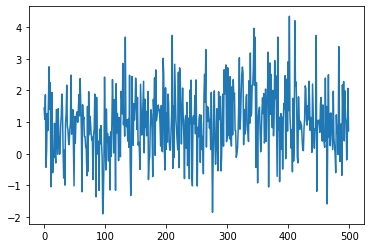

In [38]:
plt.plot(history)

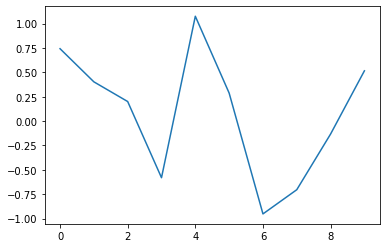

In [39]:
plt.plot(estimated)

In [40]:
eps = [0.1,0.3,0.6]
histories = []
estimates = []
for i in eps:
  bandit = Bandit()
  history,estimated = experiment(bandit,500,i)
  histories.append(history)
  estimates.append(estimated)

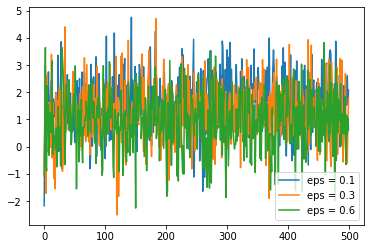

In [41]:
plt.plot(histories[0],label="eps = 0.1")
plt.plot(histories[1],label="eps = 0.3")
plt.plot(histories[2],label="eps = 0.6")
plt.legend()
plt.show()

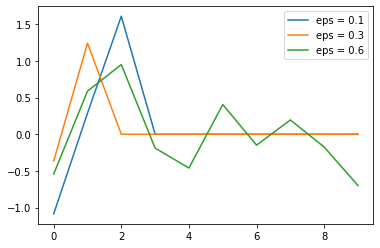

In [42]:
plt.plot(estimates[0],label="eps = 0.1")
plt.plot(estimates[1],label="eps = 0.3")
plt.plot(estimates[2],label="eps = 0.6")
plt.legend()
plt.show()